<a href="https://colab.research.google.com/github/sneha5678-cmyk/12-FEB-2025/blob/main/WINE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Performing clustering analysis...

K-means Clustering Results:
Number of clusters: 3
Silhouette Score: 0.285

DBSCAN Clustering Results:
Number of clusters: 0
Number of noise points: 178
Silhouette Score: 0.000

Hierarchical Clustering Results:
Number of clusters: 3
Silhouette Score: 0.277


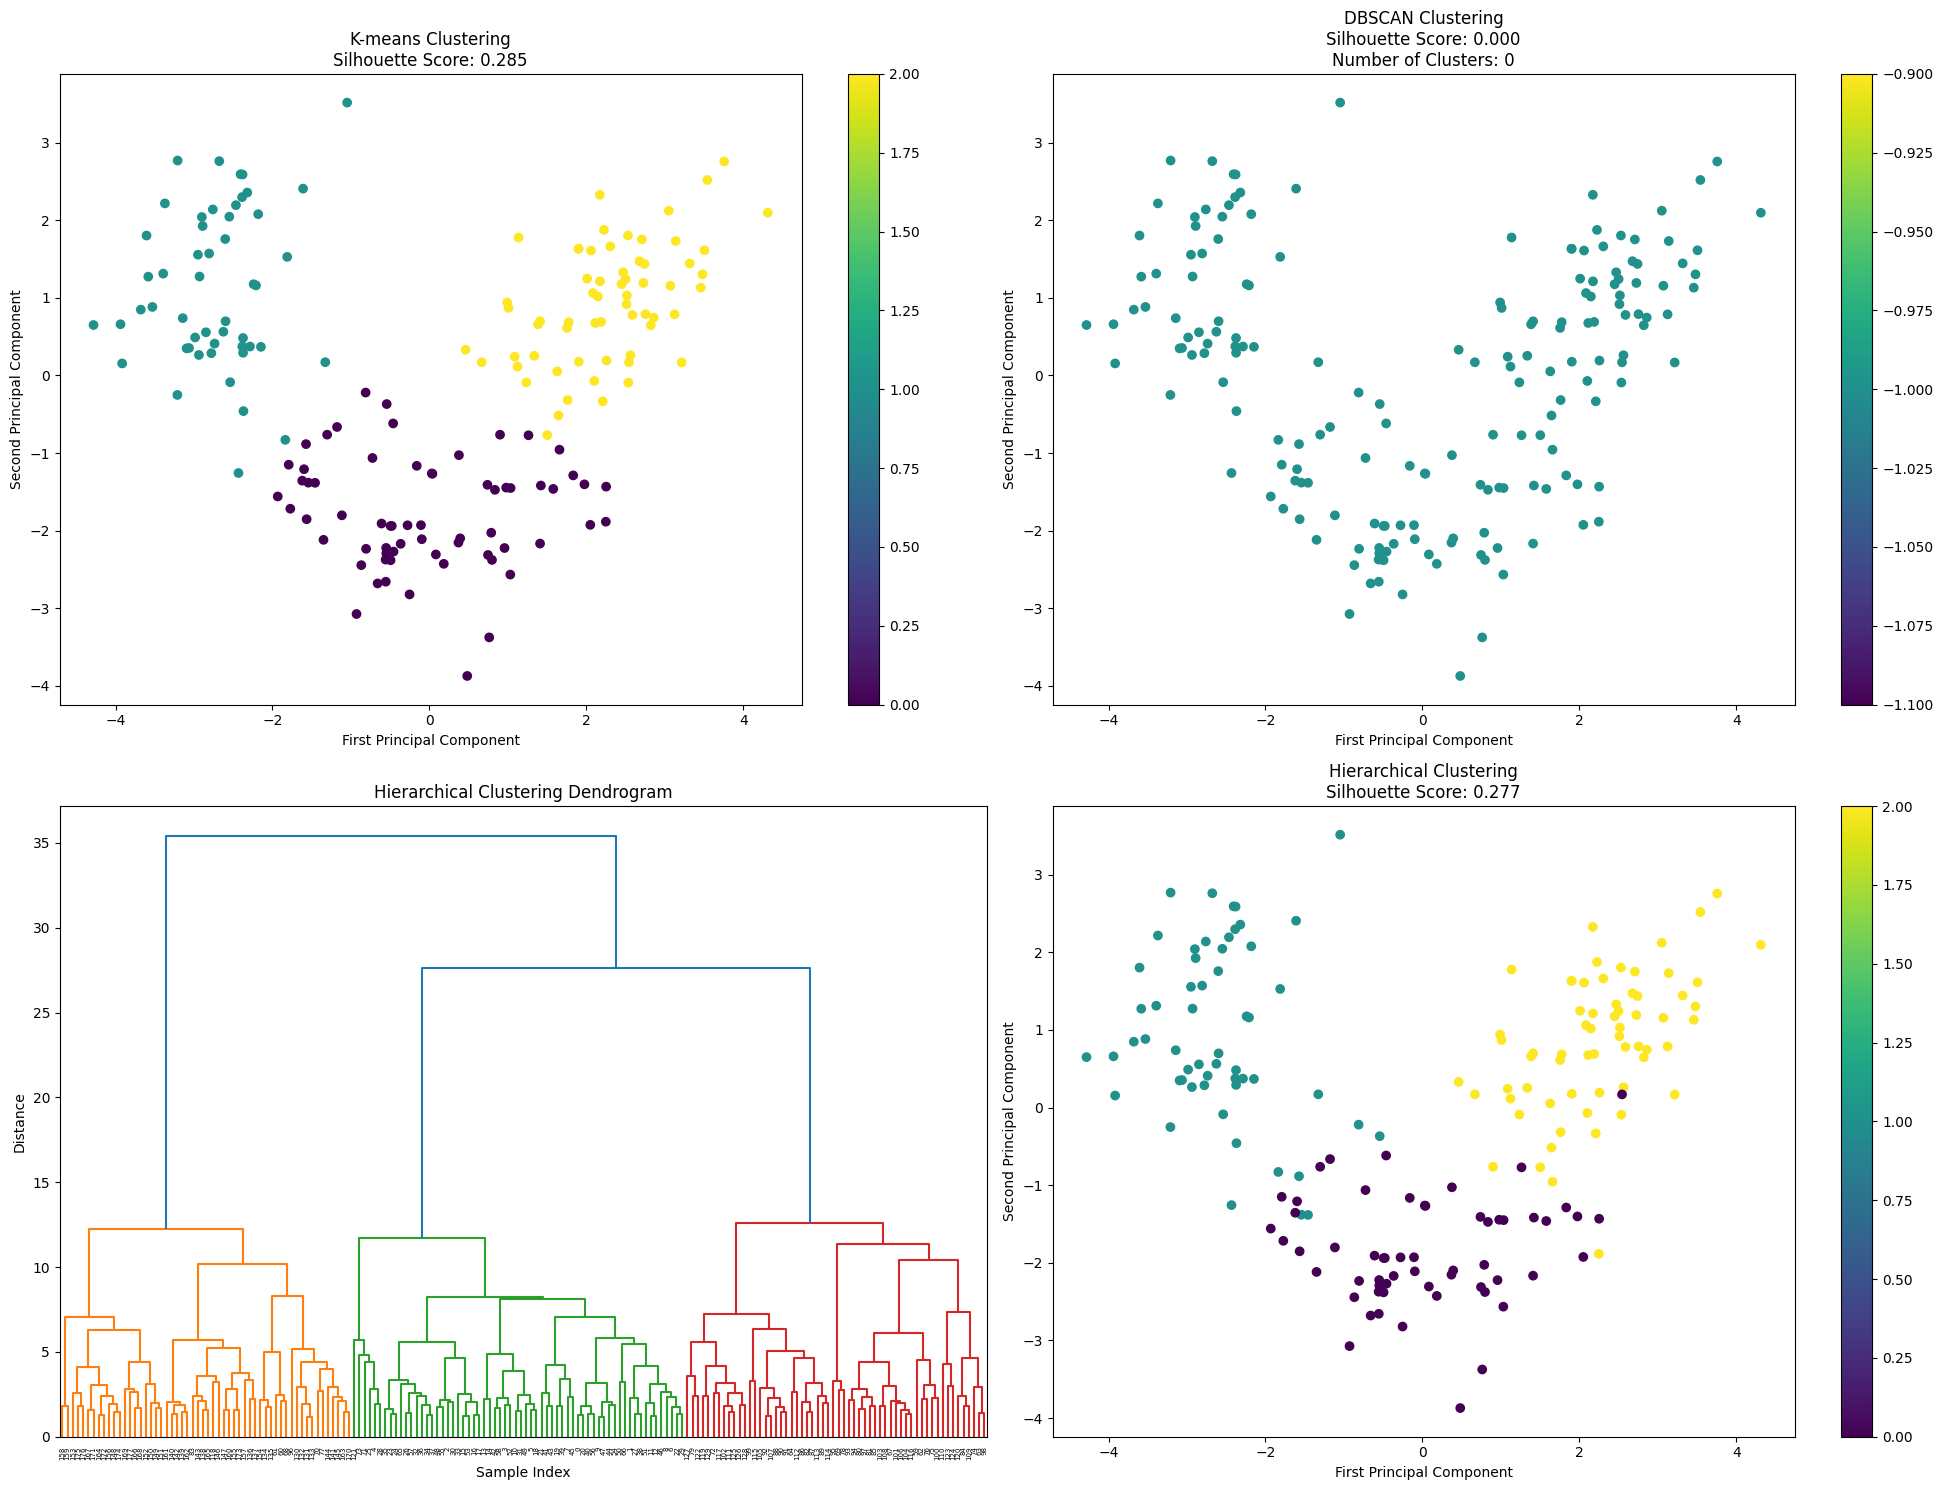


Results have been saved to 'wine_clustering_results.csv'


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Read the dataset
df = pd.read_csv('/content/wine_Dataset.csv')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Apply PCA for visualization (reducing to 2 components)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a figure with subplots for all visualizations
plt.figure(figsize=(20, 15))

# 1. K-means Clustering
def perform_kmeans(X, X_pca, n_clusters=3):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    # Calculate silhouette score
    sil_score = silhouette_score(X, labels)

    # Plotting
    plt.subplot(2, 2, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.title(f'K-means Clustering\nSilhouette Score: {sil_score:.3f}')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)

    return labels, sil_score

# 2. DBSCAN Clustering
def perform_dbscan(X, X_pca, eps=0.5, min_samples=3):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    # Calculate silhouette score if more than one cluster is found and no noise points (-1)
    if len(set(labels)) > 1 and -1 not in labels:
        sil_score = silhouette_score(X, labels)
    else:
        sil_score = 0

    # Plotting
    plt.subplot(2, 2, 2)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.title(f'DBSCAN Clustering\nSilhouette Score: {sil_score:.3f}\nNumber of Clusters: {len(set(labels)) - (1 if -1 in labels else 0)}')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)

    return labels, sil_score

# 3. Hierarchical Clustering
def perform_hierarchical(X, X_pca, n_clusters=3):
    # Create linkage matrix
    linkage_matrix = linkage(X, method='ward')

    # Perform clustering
    hierarchical = AgglomerativeClustering(n_clusters=n_clusters)
    labels = hierarchical.fit_predict(X)

    # Calculate silhouette score
    sil_score = silhouette_score(X, labels)

    # Plotting dendrogram
    plt.subplot(2, 2, 3)
    dendrogram(linkage_matrix)
    plt.title('Hierarchical Clustering Dendrogram')
    plt.xlabel('Sample Index')
    plt.ylabel('Distance')

    # Plotting clusters
    plt.subplot(2, 2, 4)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis')
    plt.title(f'Hierarchical Clustering\nSilhouette Score: {sil_score:.3f}')
    plt.xlabel('First Principal Component')
    plt.ylabel('Second Principal Component')
    plt.colorbar(scatter)

    return labels, sil_score

# Perform all clustering methods
print("Performing clustering analysis...")

# K-means
kmeans_labels, kmeans_score = perform_kmeans(X_scaled, X_pca)
print(f"\nK-means Clustering Results:")
print(f"Number of clusters: {len(set(kmeans_labels))}")
print(f"Silhouette Score: {kmeans_score:.3f}")

# DBSCAN
dbscan_labels, dbscan_score = perform_dbscan(X_scaled, X_pca)
print(f"\nDBSCAN Clustering Results:")
print(f"Number of clusters: {len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)}")
print(f"Number of noise points: {list(dbscan_labels).count(-1)}")
print(f"Silhouette Score: {dbscan_score:.3f}")

# Hierarchical
hierarchical_labels, hierarchical_score = perform_hierarchical(X_scaled, X_pca)
print(f"\nHierarchical Clustering Results:")
print(f"Number of clusters: {len(set(hierarchical_labels))}")
print(f"Silhouette Score: {hierarchical_score:.3f}")

# Adjust layout and display plots
plt.tight_layout()
plt.show()

# Create a DataFrame with clustering results
results_df = pd.DataFrame({
    'K-means_Cluster': kmeans_labels,
    'DBSCAN_Cluster': dbscan_labels,
    'Hierarchical_Cluster': hierarchical_labels
})

# Add results to original dataset
df_with_clusters = pd.concat([df, results_df], axis=1)

# Save results to CSV
df_with_clusters.to_csv('/content/wine_clustering_results.csv', index=False)
print("\nResults have been saved to 'wine_clustering_results.csv'")

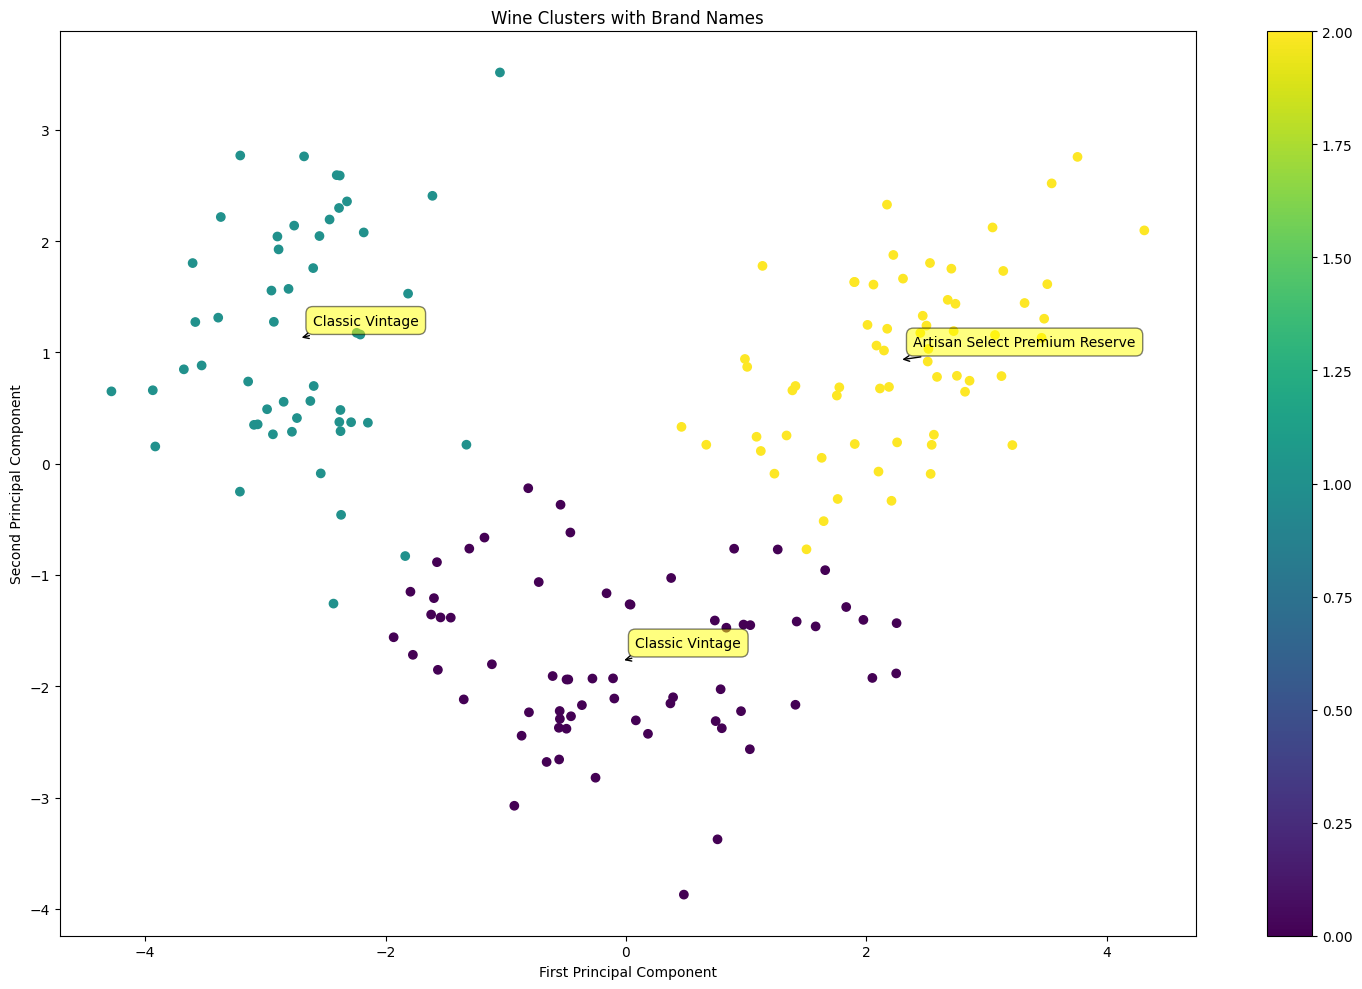


Detailed Cluster Analysis:

Cluster 1: Classic Vintage
Top distinguishing characteristics:
- Hue: 11.0% different from average
- Dilution: 7.3% different from average
- Alcalinity: 2.9% different from average
------------------------------

Cluster 2: Classic Vintage
Top distinguishing characteristics:
- Color: 43.0% different from average
- Malic: 41.6% different from average
- Nonflavanoids: 24.9% different from average
------------------------------

Cluster 3: Artisan Select Premium Reserve
Top distinguishing characteristics:
- Flavanoids: 48.0% different from average
- Proline: 47.3% different from average
- Phenols: 24.1% different from average
------------------------------

Results have been saved to 'wine_brands_results.csv'


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

# Read the dataset
df = pd.read_csv('/content/wine_Dataset.csv')

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Store column names for later use
feature_names = df.columns.tolist()

# Apply PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Perform K-means clustering
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Function to analyze cluster characteristics and assign brand names
def analyze_clusters_and_assign_brands(df, labels, cluster_centers_scaled):
    # Inverse transform the cluster centers to get original scale
    cluster_centers = scaler.inverse_transform(cluster_centers_scaled)

    # Create a DataFrame for cluster centers
    cluster_centers_df = pd.DataFrame(
        cluster_centers,
        columns=feature_names
    )

    # Initialize dictionaries for cluster analysis
    cluster_characteristics = {}
    brand_names = {}

    for cluster in range(n_clusters):
        # Get cluster data
        cluster_data = df[labels == cluster]

        # Calculate mean values for this cluster
        cluster_means = cluster_data.mean()

        # Identify dominant characteristics
        # Compare with overall means to find standout features
        overall_means = df.mean()
        relative_strengths = (cluster_means - overall_means) / overall_means * 100

        # Store top characteristics
        top_features = relative_strengths.nlargest(3)
        cluster_characteristics[cluster] = top_features

        # Assign brand names based on characteristics
        if cluster_means['Alcohol'] > df['Alcohol'].mean() and cluster_means['Phenols'] > df['Phenols'].mean():
            brand_names[cluster] = "Premium Reserve"
        elif cluster_means['Color'] > df['Color'].mean() and cluster_means['Flavanoids'] > df['Flavanoids'].mean():
            brand_names[cluster] = "Rich Ruby Collection"
        else:
            brand_names[cluster] = "Classic Vintage"

        # Further refine brand names based on specific characteristics
        if cluster_means['Proline'] > df['Proline'].mean() * 1.2:
            brand_names[cluster] = "Artisan Select " + brand_names[cluster]
        elif cluster_means['Magnesium'] > df['Magnesium'].mean() * 1.1:
            brand_names[cluster] = "Mineral Crest " + brand_names[cluster]

    return cluster_characteristics, brand_names

# Analyze clusters and get brand names
cluster_characteristics, brand_names = analyze_clusters_and_assign_brands(
    df, kmeans_labels, kmeans.cluster_centers_
)

# Create visualization
plt.figure(figsize=(15, 10))

# Plot clusters with brand names
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('Wine Clusters with Brand Names')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# Add brand name labels to the plot
for cluster in range(n_clusters):
    # Get center of each cluster
    cluster_center = np.mean(X_pca[kmeans_labels == cluster], axis=0)
    plt.annotate(brand_names[cluster],
                xy=(cluster_center[0], cluster_center[1]),
                xytext=(10, 10),
                textcoords='offset points',
                bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
                arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))

plt.colorbar(scatter)
plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nDetailed Cluster Analysis:")
print("=" * 50)
for cluster in range(n_clusters):
    print(f"\nCluster {cluster + 1}: {brand_names[cluster]}")
    print("Top distinguishing characteristics:")
    for feature, value in cluster_characteristics[cluster].items():
        print(f"- {feature}: {value:.1f}% different from average")
    print("-" * 30)

# Save results to DataFrame
results_df = pd.DataFrame({
    'Cluster': kmeans_labels,
    'Brand_Name': [brand_names[label] for label in kmeans_labels]
})

# Combine with original data and save
final_df = pd.concat([df, results_df], axis=1)
final_df.to_csv('/content/wine_brands_results.csv', index=False)
print("\nResults have been saved to 'wine_brands_results.csv'")

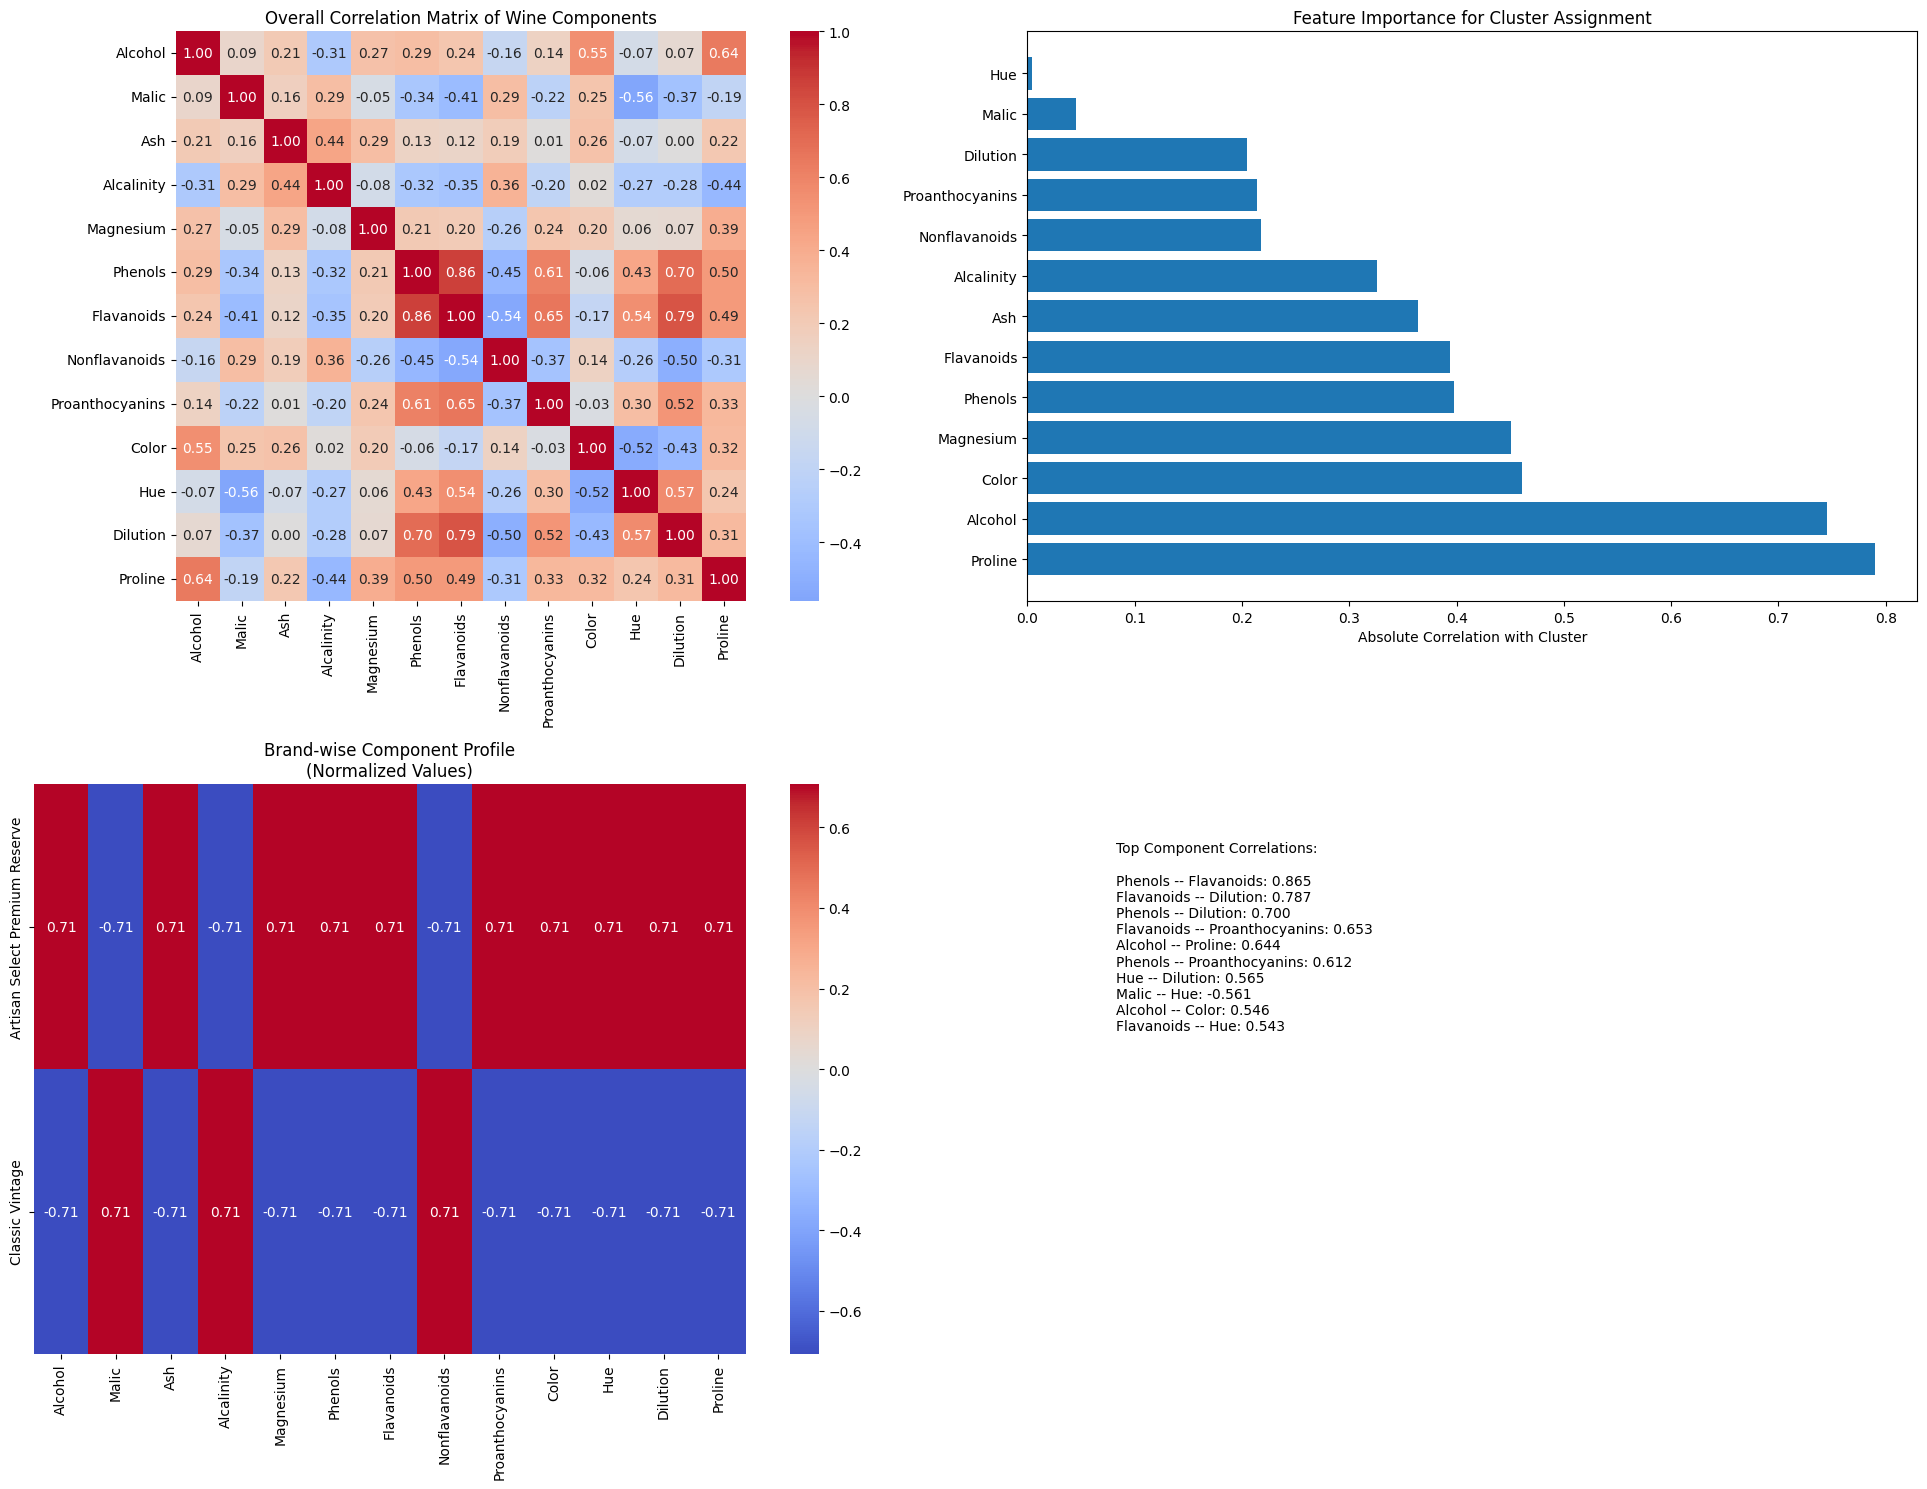


Detailed Correlation Analysis:

1. Most Influential Components for Clustering:
Proline: 0.790
Alcohol: 0.745
Color: 0.461
Magnesium: 0.451
Phenols: 0.398

2. Key Component Relationships:
Phenols and Flavanoids: 0.865
Flavanoids and Dilution: 0.787
Phenols and Dilution: 0.700
Flavanoids and Proanthocyanins: 0.653
Alcohol and Proline: 0.644

3. Brand Distinguishing Features:

Artisan Select Premium Reserve:
Distinctive components:
- Phenols: 0.707 std. from mean
- Ash: 0.707 std. from mean
- Hue: 0.707 std. from mean

Classic Vintage:
Distinctive components:
- Alcalinity: 0.707 std. from mean
- Nonflavanoids: 0.707 std. from mean
- Malic: 0.707 std. from mean


ValueError: dictionary update sequence element #0 has length 18; 2 is required

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Read the dataset
df = pd.read_csv('/content/wine_Dataset.csv')

# Create figure for multiple visualizations
plt.figure(figsize=(20, 15))

# 1. Overall Correlation Matrix
plt.subplot(2, 2, 1)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True)
plt.title('Overall Correlation Matrix of Wine Components')

# 2. Feature Importance Analysis
# Calculate correlation with cluster assignments
df_with_clusters = pd.read_csv('/content/wine_brands_results.csv')
cluster_correlations = {}

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Calculate correlation between each feature and cluster assignment
correlations_with_cluster = []
for column in df.columns:
    correlation = np.corrcoef(X_scaled[column], df_with_clusters['Cluster'])[0,1]
    correlations_with_cluster.append((column, abs(correlation)))

# Sort by absolute correlation
correlations_with_cluster.sort(key=lambda x: x[1], reverse=True)

# Plot feature importance
plt.subplot(2, 2, 2)
features, correlations = zip(*correlations_with_cluster)
plt.barh(features, correlations)
plt.title('Feature Importance for Cluster Assignment')
plt.xlabel('Absolute Correlation with Cluster')

# 3. Brand-wise Component Analysis
plt.subplot(2, 2, 3)
brands = df_with_clusters['Brand_Name'].unique()
brand_profiles = {}

for brand in brands:
    brand_data = df_with_clusters[df_with_clusters['Brand_Name'] == brand]
    brand_profiles[brand] = brand_data[df.columns].mean()

brand_profiles_df = pd.DataFrame(brand_profiles).T
# Normalize for visualization
brand_profiles_normalized = (brand_profiles_df - brand_profiles_df.mean()) / brand_profiles_df.std()

sns.heatmap(brand_profiles_normalized,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Brand-wise Component Profile\n(Normalized Values)')

# 4. Top Correlations Table
plt.subplot(2, 2, 4)
plt.axis('off')

# Get top correlations
top_correlations = []
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        corr = correlation_matrix.iloc[i,j]
        if abs(corr) > 0.5:  # Threshold for strong correlations
            top_correlations.append((df.columns[i],
                                   df.columns[j],
                                   corr))

# Sort by absolute correlation
top_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

# Create table text
table_text = "Top Component Correlations:\n\n"
for comp1, comp2, corr in top_correlations[:10]:  # Show top 10
    table_text += f"{comp1} -- {comp2}: {corr:.3f}\n"

plt.text(0.1, 0.9, table_text, fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nDetailed Correlation Analysis:")
print("=" * 50)
print("\n1. Most Influential Components for Clustering:")
for feature, correlation in correlations_with_cluster[:5]:
    print(f"{feature}: {correlation:.3f}")

print("\n2. Key Component Relationships:")
for comp1, comp2, corr in top_correlations[:5]:
    print(f"{comp1} and {comp2}: {corr:.3f}")

print("\n3. Brand Distinguishing Features:")
for brand in brands:
    print(f"\n{brand}:")
    brand_data = brand_profiles_normalized.loc[brand]
    top_features = brand_data.nlargest(3)
    print("Distinctive components:")
    for feature, value in top_features.items():
        print(f"- {feature}: {value:.3f} std. from mean")

# Save detailed results
analysis_results = {
    'Feature_Importance': dict(correlations_with_cluster),
    'Top_Correlations': dict([f"{c1}_{c2}" for c1, c2, _ in top_correlations[:10]])
}
results_df = pd.DataFrame(analysis_results)
results_df.to_csv('/content/wine_correlation_analysis.csv')
print("\nDetailed correlation analysis has been saved to 'wine_correlation_analysis.csv'")

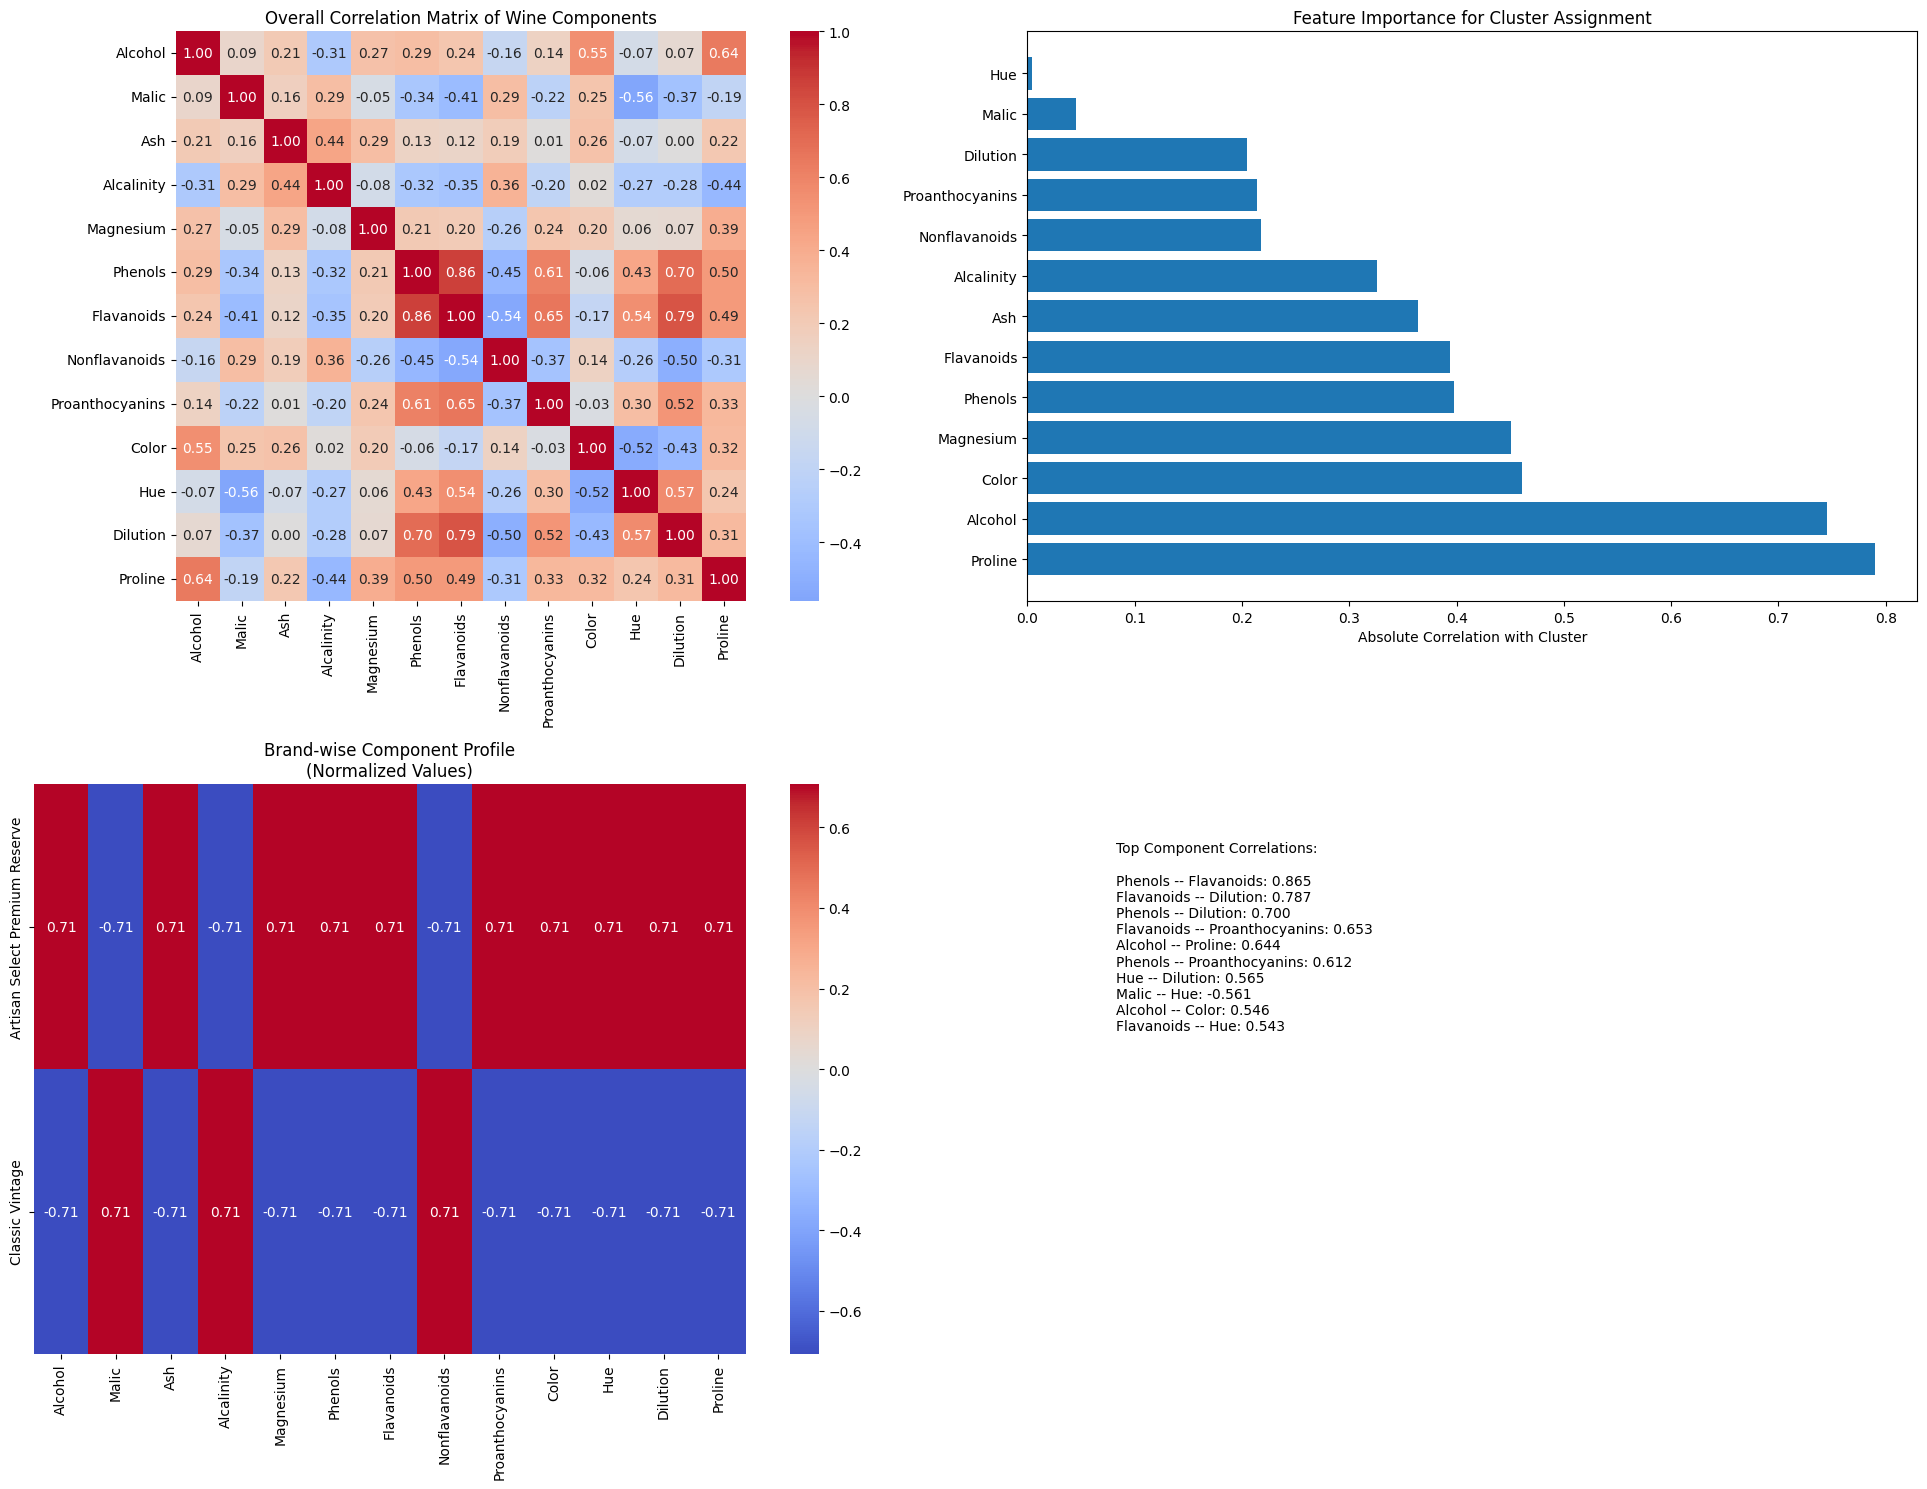


Detailed Correlation Analysis:

1. Most Influential Components for Clustering:
Proline: 0.790
Alcohol: 0.745
Color: 0.461
Magnesium: 0.451
Phenols: 0.398

2. Key Component Relationships:
Phenols and Flavanoids: 0.865
Flavanoids and Dilution: 0.787
Phenols and Dilution: 0.700
Flavanoids and Proanthocyanins: 0.653
Alcohol and Proline: 0.644

3. Brand Distinguishing Features:

Artisan Select Premium Reserve:
Distinctive components:
- Phenols: 0.707 std. from mean
- Ash: 0.707 std. from mean
- Hue: 0.707 std. from mean

Classic Vintage:
Distinctive components:
- Alcalinity: 0.707 std. from mean
- Nonflavanoids: 0.707 std. from mean
- Malic: 0.707 std. from mean

Analysis results have been saved to separate CSV files:
- wine_feature_importance.csv
- wine_top_correlations.csv


In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Read the dataset
df = pd.read_csv('/content/wine_Dataset.csv')

# Create figure for multiple visualizations
plt.figure(figsize=(20, 15))

# 1. Overall Correlation Matrix
plt.subplot(2, 2, 1)
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True)
plt.title('Overall Correlation Matrix of Wine Components')

# 2. Feature Importance Analysis
# Calculate correlation with cluster assignments
df_with_clusters = pd.read_csv('/content/wine_brands_results.csv')
cluster_correlations = {}

# Standardize the features
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Calculate correlation between each feature and cluster assignment
correlations_with_cluster = []
for column in df.columns:
    correlation = np.corrcoef(X_scaled[column], df_with_clusters['Cluster'])[0,1]
    correlations_with_cluster.append((column, abs(correlation)))

# Sort by absolute correlation
correlations_with_cluster.sort(key=lambda x: x[1], reverse=True)

# Plot feature importance
plt.subplot(2, 2, 2)
features, correlations = zip(*correlations_with_cluster)
plt.barh(features, correlations)
plt.title('Feature Importance for Cluster Assignment')
plt.xlabel('Absolute Correlation with Cluster')

# 3. Brand-wise Component Analysis
plt.subplot(2, 2, 3)
brands = df_with_clusters['Brand_Name'].unique()
brand_profiles = {}

for brand in brands:
    brand_data = df_with_clusters[df_with_clusters['Brand_Name'] == brand]
    brand_profiles[brand] = brand_data[df.columns].mean()

brand_profiles_df = pd.DataFrame(brand_profiles).T
# Normalize for visualization
brand_profiles_normalized = (brand_profiles_df - brand_profiles_df.mean()) / brand_profiles_df.std()

sns.heatmap(brand_profiles_normalized,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f')
plt.title('Brand-wise Component Profile\n(Normalized Values)')

# 4. Top Correlations Table
plt.subplot(2, 2, 4)
plt.axis('off')

# Get top correlations
top_correlations = []
for i in range(len(df.columns)):
    for j in range(i+1, len(df.columns)):
        corr = correlation_matrix.iloc[i,j]
        if abs(corr) > 0.5:  # Threshold for strong correlations
            top_correlations.append((df.columns[i],
                                   df.columns[j],
                                   corr))

# Sort by absolute correlation
top_correlations.sort(key=lambda x: abs(x[2]), reverse=True)

# Create table text
table_text = "Top Component Correlations:\n\n"
for comp1, comp2, corr in top_correlations[:10]:  # Show top 10
    table_text += f"{comp1} -- {comp2}: {corr:.3f}\n"

plt.text(0.1, 0.9, table_text, fontsize=10, verticalalignment='top')

plt.tight_layout()
plt.show()

# Print detailed analysis
print("\nDetailed Correlation Analysis:")
print("=" * 50)
print("\n1. Most Influential Components for Clustering:")
for feature, correlation in correlations_with_cluster[:5]:
    print(f"{feature}: {correlation:.3f}")

print("\n2. Key Component Relationships:")
for comp1, comp2, corr in top_correlations[:5]:
    print(f"{comp1} and {comp2}: {corr:.3f}")

print("\n3. Brand Distinguishing Features:")
for brand in brands:
    print(f"\n{brand}:")
    brand_data = brand_profiles_normalized.loc[brand]
    top_features = brand_data.nlargest(3)
    print("Distinctive components:")
    for feature, value in top_features.items():
        print(f"- {feature}: {value:.3f} std. from mean")

# Fixed: Save detailed results
analysis_results = {
    'Feature_Importance': dict(correlations_with_cluster),
    'Top_Correlations': {f"{c1}_{c2}": corr for c1, c2, corr in top_correlations[:10]}
}

# Create separate DataFrames for each type of result
feature_importance_df = pd.DataFrame(list(correlations_with_cluster),
                                   columns=['Feature', 'Importance'])
top_correlations_df = pd.DataFrame(top_correlations[:10],
                                  columns=['Component1', 'Component2', 'Correlation'])

# Save to separate CSV files for better organization
feature_importance_df.to_csv('/content/wine_feature_importance.csv', index=False)
top_correlations_df.to_csv('/content/wine_top_correlations.csv', index=False)

print("\nAnalysis results have been saved to separate CSV files:")
print("- wine_feature_importance.csv")
print("- wine_top_correlations.csv")


Marketing Strategy Report

Brand: Artisan Select Premium Reserve
------------------------------
1. Brand Positioning:
   - Price Point: Premium
   - Quality Level: High

2. Target Audience:
   - Premium wine enthusiasts
   - Fine dining establishments
   - Luxury retailers

3. Key Selling Points:
   - Superior taste profile
   - Award-winning quality
   - Expert craftsmanship

4. Marketing Channels:
   - Wine specialty magazines
   - High-end wine clubs
   - Sommelier partnerships

5. Promotional Themes:
   - Emphasis on proline content
   - Emphasis on alcohol content
   - Emphasis on color content

6. Pricing Strategy:
   - Premium pricing

Brand: Classic Vintage
------------------------------
1. Brand Positioning:
   - Price Point: Standard
   - Quality Level: High

2. Target Audience:
   - casual wine drinkers
   - restaurants
   - retail chains

3. Key Selling Points:
   - Superior taste profile
   - Award-winning quality
   - Expert craftsmanship

4. Marketing Channels:
   - Soc

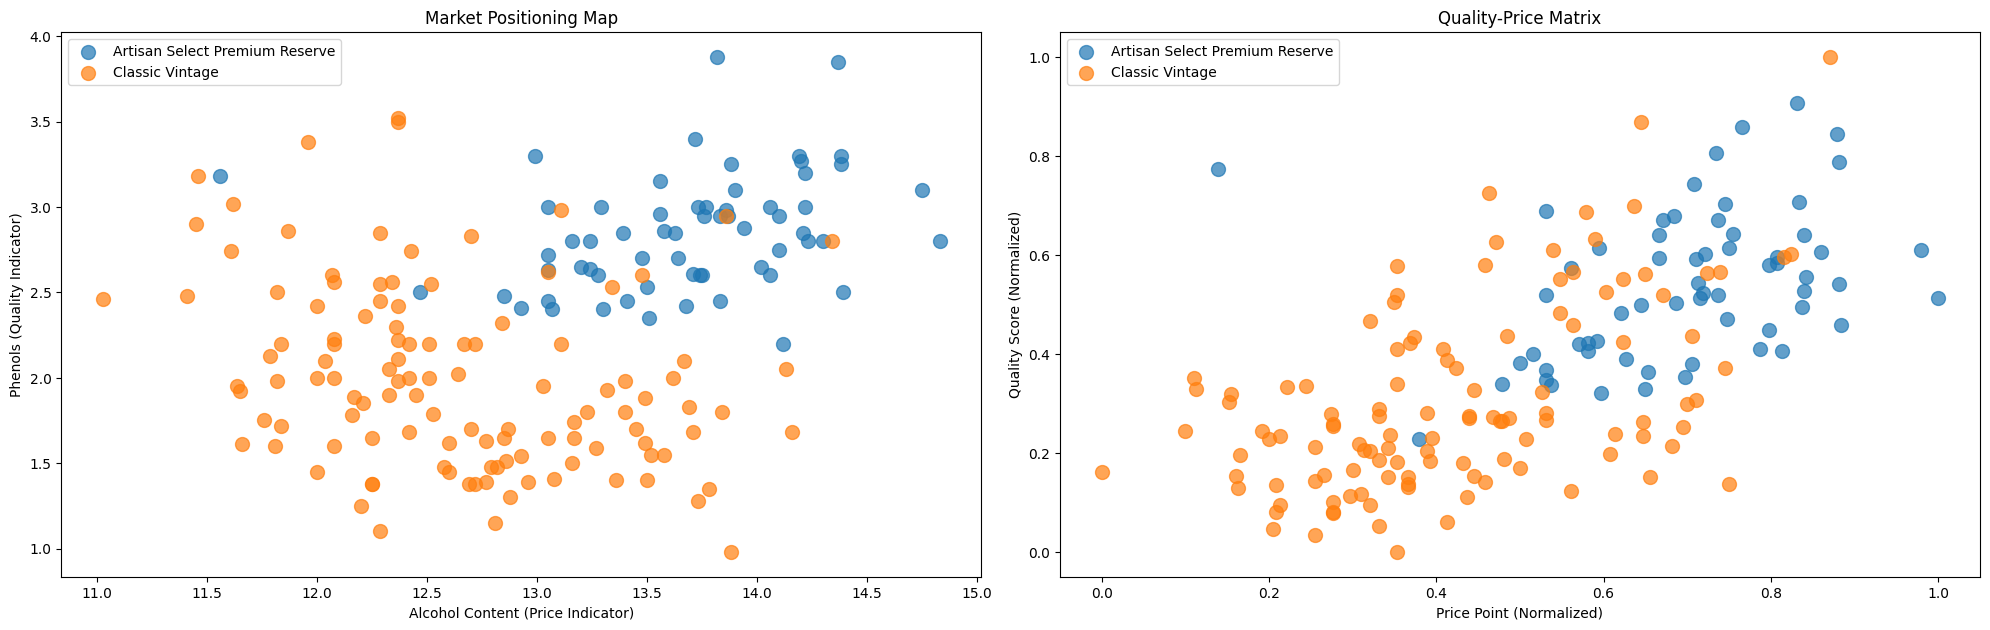


Detailed marketing strategy has been saved to 'wine_marketing_strategy.csv'


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Read the data files
wine_data = pd.read_csv('/content/wine_Dataset.csv')
feature_importance = pd.read_csv('/content/wine_feature_importance.csv')
correlations = pd.read_csv('/content/wine_top_correlations.csv')
branded_data = pd.read_csv('/content/wine_brands_results.csv')

def generate_marketing_insights():
    """Generate comprehensive marketing insights for each brand"""

    # Create a figure for visualizations
    plt.figure(figsize=(20, 12))

    # 1. Brand Positioning Analysis
    brand_profiles = {}
    brands = branded_data['Brand_Name'].unique()

    for brand in brands:
        brand_data = branded_data[branded_data['Brand_Name'] == brand]
        brand_profiles[brand] = {
            'avg_price_point': np.mean(brand_data['Alcohol']),  # Using Alcohol content as price indicator
            'quality_indicators': {
                'phenols': np.mean(brand_data['Phenols']),
                'flavanoids': np.mean(brand_data['Flavanoids']),
                'color': np.mean(brand_data['Color'])
            },
            'distinctive_features': feature_importance['Feature'].iloc[:3].tolist()
        }

    # 2. Market Positioning Visualization
    plt.subplot(2, 2, 1)
    for brand in brands:
        brand_data = branded_data[branded_data['Brand_Name'] == brand]
        plt.scatter(brand_data['Alcohol'], brand_data['Phenols'],
                   label=brand, alpha=0.7, s=100)
    plt.xlabel('Alcohol Content (Price Indicator)')
    plt.ylabel('Phenols (Quality Indicator)')
    plt.title('Market Positioning Map')
    plt.legend()

    # 3. Quality-Price Matrix
    scaler = MinMaxScaler()
    quality_score = branded_data[['Phenols', 'Flavanoids', 'Color']].mean(axis=1)
    price_indicator = branded_data['Alcohol']

    plt.subplot(2, 2, 2)
    for brand in brands:
        mask = branded_data['Brand_Name'] == brand
        plt.scatter(scaler.fit_transform(price_indicator.values.reshape(-1, 1))[mask],
                   scaler.fit_transform(quality_score.values.reshape(-1, 1))[mask],
                   label=brand, alpha=0.7, s=100)
    plt.xlabel('Price Point (Normalized)')
    plt.ylabel('Quality Score (Normalized)')
    plt.title('Quality-Price Matrix')
    plt.legend()

    # 4. Generate Marketing Recommendations
    marketing_recommendations = {}

    for brand in brands:
        brand_data = branded_data[branded_data['Brand_Name'] == brand]
        profile = brand_profiles[brand]

        # Initialize recommendations dictionary
        recommendations = {
            'target_audience': [],
            'key_selling_points': [],
            'marketing_channels': [],
            'pricing_strategy': [],
            'promotional_themes': []
        }

        # Analyze brand characteristics
        quality_level = np.mean(list(profile['quality_indicators'].values()))
        price_level = profile['avg_price_point']

        # Generate recommendations based on brand characteristics
        if price_level > np.median(branded_data['Alcohol']):
            recommendations['target_audience'].extend([
                'Premium wine enthusiasts',
                'Fine dining establishments',
                'Luxury retailers'
            ])
            recommendations['pricing_strategy'].append('Premium pricing')
            recommendations['marketing_channels'].extend([
                'Wine specialty magazines',
                'High-end wine clubs',
                'Sommelier partnerships'
            ])
        else:
            recommendations['target_audience'].extend([
                'casual wine drinkers',
                'restaurants',
                'retail chains'
            ])
            recommendations['pricing_strategy'].append('Competitive pricing')
            recommendations['marketing_channels'].extend([
                'Social media',
                'Local wine shops',
                'Online retailers'
            ])

        # Add quality-based recommendations
        if quality_level > np.median(list(profile['quality_indicators'].values())):
            recommendations['key_selling_points'].extend([
                'Superior taste profile',
                'Award-winning quality',
                'Expert craftsmanship'
            ])
        else:
            recommendations['key_selling_points'].extend([
                'Great value',
                'Versatile pairing options',
                'Approachable taste'
            ])

        # Add promotional themes based on distinctive features
        recommendations['promotional_themes'].extend([
            f"Emphasis on {feature.lower()} content"
            for feature in profile['distinctive_features']
        ])

        marketing_recommendations[brand] = recommendations

    # 5. Create Marketing Strategy Report
    print("\nMarketing Strategy Report")
    print("=" * 50)

    for brand in brands:
        print(f"\nBrand: {brand}")
        print("-" * 30)

        recs = marketing_recommendations[brand]
        profile = brand_profiles[brand]

        print("1. Brand Positioning:")
        print(f"   - Price Point: {'Premium' if profile['avg_price_point'] > np.median(branded_data['Alcohol']) else 'Standard'}")
        print(f"   - Quality Level: {'High' if np.mean(list(profile['quality_indicators'].values())) > 0.5 else 'Standard'}")

        print("\n2. Target Audience:")
        for audience in recs['target_audience']:
            print(f"   - {audience}")

        print("\n3. Key Selling Points:")
        for point in recs['key_selling_points']:
            print(f"   - {point}")

        print("\n4. Marketing Channels:")
        for channel in recs['marketing_channels']:
            print(f"   - {channel}")

        print("\n5. Promotional Themes:")
        for theme in recs['promotional_themes']:
            print(f"   - {theme}")

        print("\n6. Pricing Strategy:")
        for strategy in recs['pricing_strategy']:
            print(f"   - {strategy}")

    plt.tight_layout()
    plt.show()

    # Save recommendations to CSV
    marketing_df = pd.DataFrame(marketing_recommendations).T
    marketing_df.to_csv('/content/wine_marketing_strategy.csv')
    print("\nDetailed marketing strategy has been saved to 'wine_marketing_strategy.csv'")

# Generate marketing insights
generate_marketing_insights()